In [1]:

"""
    t, y = myeulersv(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a matrix of correspondinig values
of the solution, y(t_i)
"""
function myeulersv(fun, a, b, n, y1)
    t = range(a, b, n)
    neqs = length(y1) # the number of the equations
    dydt = zeros(neqs)
    y = zeros(neqs, n)    # preallocate the storage for the solutions
    h = t[2] - t[1]
    y[:, 1] = y1         # store the initial conditions in the first column
    for i = 1:n-1
        k1 = h*fun(t[i], y[:, i])
        y[:, i+1] = y[:, i] + k1
    end
    return t, y
end

myeulersv

In [2]:

"""
    dy/dt = funv(t,y)
Right hnad side of the oscillator with friction
"""
function friction(t, y)
    dydt = zeros(2)
    dydt[1] = y[2]
    dydt[2] = -y[1]-y[2]
    return dydt
end

friction

In [4]:
a = 0.0
b = 10.0
n = 100
y1 = [1.0, 0.0]

2-element Vector{Float64}:
 1.0
 0.0

In [5]:
t, y = myeulersv(friction, a, b, n, y1)

(0.0:0.10101010101010101:10.0, [1.0 1.0 … -0.006372540748269553 -0.00682207512369449; 0.0 -0.10101010101010101 … -0.0044503903167068684 -0.00335716495660824])

In [6]:
using PyPlot

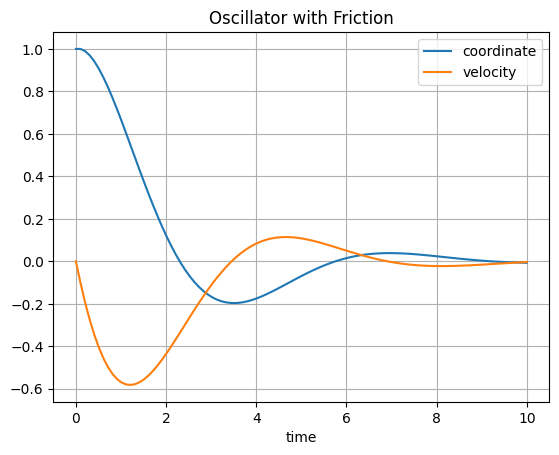

PyObject Text(0.5, 24.0, 'time')

In [9]:
plot(t, y[1, :], label="coordinate")
plot(t, y[2, :], label="velocity")
grid(true)
title("Oscillator with Friction")
legend()
xlabel("time")


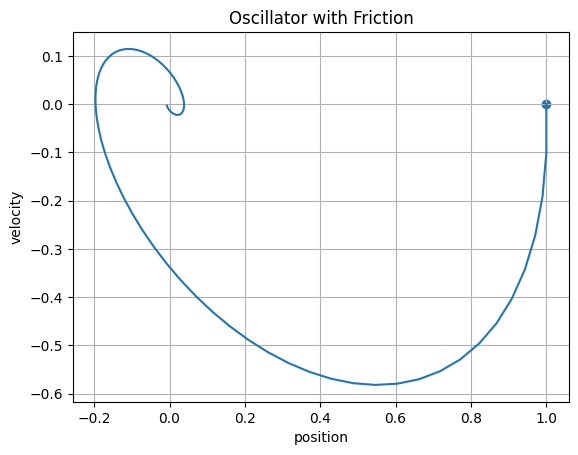

PyObject Text(24.000000000000007, 0.5, 'velocity')

In [11]:

plot(y[1, :], y[2, :])
grid(true)
scatter(y1...)
title("Oscillator with Friction")
xlabel("position")
ylabel("velocity")